In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

In [41]:
df = pd.read_csv('kyphosis.csv')

In [42]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


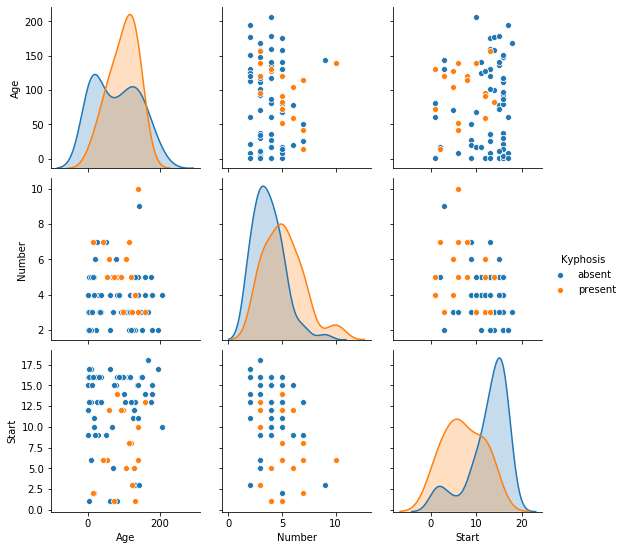

In [44]:
sns.pairplot(df, hue='Kyphosis')

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model = DecisionTreeClassifier()

In [50]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
predictions = model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print('CONFUSION MATRIX *********************************\n' ,confusion_matrix(y_test,predictions) )
print('CLASSIFICATION REPORT *********************************\n' , classification_report(y_test, predictions) )

CONFUSION MATRIX *********************************
 [[18  2]
 [ 4  1]]
CLASSIFICATION REPORT *********************************
               precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



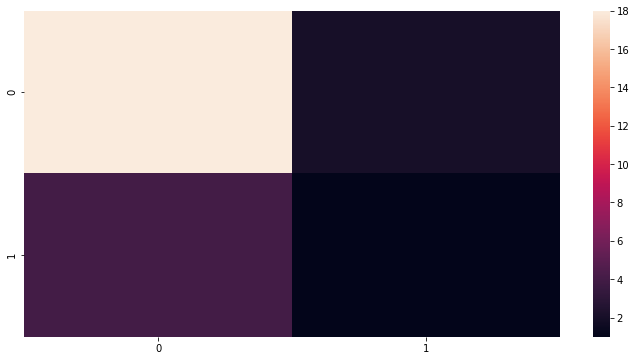

In [54]:
sns.heatmap(confusion_matrix(y_test,predictions))

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=150)

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rfc_pred = rfc.predict(X_test)

In [59]:
rfc_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [60]:
print('CONFUSION MATRIX *********************************\n' ,confusion_matrix(y_test,rfc_pred) )
print('CLASSIFICATION REPORT *********************************\n' , classification_report(y_test, rfc_pred) )

CONFUSION MATRIX *********************************
 [[18  2]
 [ 4  1]]
CLASSIFICATION REPORT *********************************
               precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



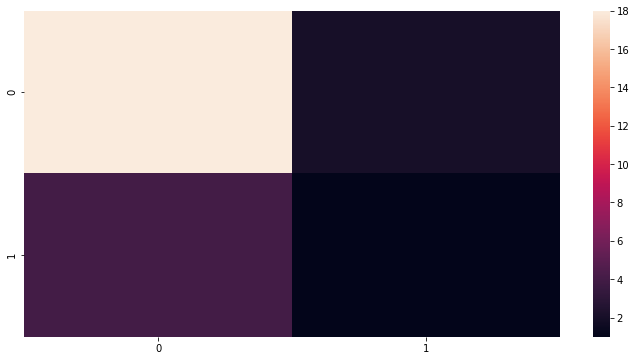

In [61]:
sns.heatmap(confusion_matrix(y_test,rfc_pred))

In [62]:
df.Kyphosis.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64